# Loading Data, looking for null value and checking the information of all the attributes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Transforming attributes into integers

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 82.6+ KB


In [8]:
data['Sex'] = le.fit_transform(data['Sex'])
data['RestingECG'] = le.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


# Plotting the Heatmap for the dataset

<AxesSubplot:>

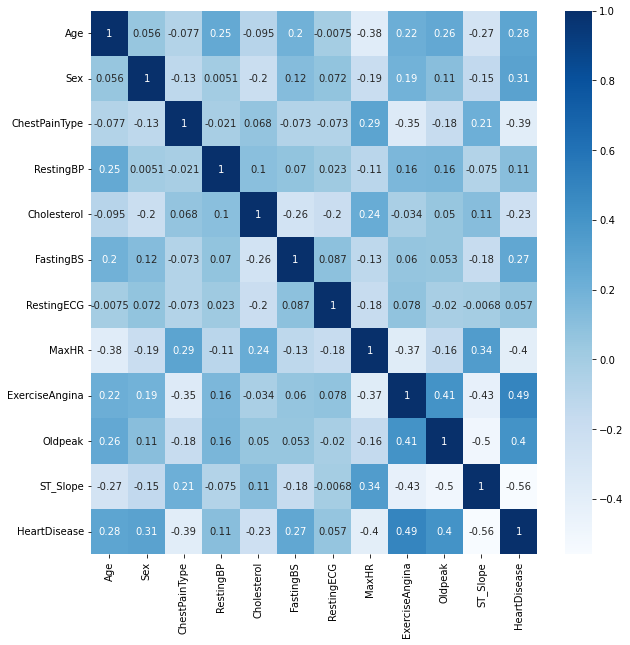

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

In [11]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


# Logistic Regression

In [12]:
X = data.iloc[:,:11]
y= data['HeartDisease']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print("X_train shape is:\t", X_train.shape)
print("X_test shape is:\t", X_test.shape)
print("y_train shape is:\t", y_train.shape)
print("y_test shape is:\t", y_test.shape)

X_train shape is:	 (734, 11)
X_test shape is:	 (184, 11)
y_train shape is:	 (734,)
y_test shape is:	 (184,)


In [14]:
lr = LogisticRegression()

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
lr.fit(X_train,y_train)

LogisticRegression()

In [17]:
print("Test Accuracy Score:\t %.3f" % lr.score(X_test, y_test))

Test Accuracy Score:	 0.832


In [18]:
y_pred = lr.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[59, 18],
       [13, 94]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        77
           1       0.84      0.88      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



In [21]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


# Support Vector Machine

In [23]:
X2 = X
y2 = y

In [23]:
#X2.drop(columns=['RestingBP','Cholesterol','RestingECG'],inplace=True)

In [24]:
X2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [25]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=0)

print("X2_train shape is:\t", X2_train.shape)
print("X2_test shape is:\t", X2_test.shape)
print("y2_train shape is:\t", y2_train.shape)
print("y2_test shape is:\t", y2_test.shape)

X2_train shape is:	 (734, 11)
X2_test shape is:	 (184, 11)
y2_train shape is:	 (734,)
y2_test shape is:	 (184,)


In [26]:
from sklearn import svm

ml = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
ml.fit(X2_train, y2_train)

#Predict the response for test dataset
y2_pred = ml.predict(X2_test)



In [27]:
print("Test Accuracy Score:\t %.3f" % ml.score(X2_test, y2_test))

Test Accuracy Score:	 0.837


In [28]:
confusion_matrix(y2_test,y2_pred)

array([[59, 18],
       [12, 95]], dtype=int64)

In [29]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        77
           1       0.84      0.89      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



# Gradient Boosting

In [47]:
X3=X
y3=y

In [48]:
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size=0.2,random_state=0)

print("X3_train shape is:\t", X3_train.shape)
print("X3_test shape is:\t", X3_test.shape)
print("y3_train shape is:\t", y3_train.shape)
print("y3_test shape is:\t", y3_test.shape)

X3_train shape is:	 (734, 11)
X3_test shape is:	 (184, 11)
y3_train shape is:	 (734,)
y3_test shape is:	 (184,)


In [49]:
# gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=5, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [50]:
# Fit the model
ModelGB.fit(X3_train, y3_train)
    
# Prediction
    
y3_pred = ModelGB.predict(X3_test)
y3_pred_prob = ModelGB.predict_proba(X3_test)


In [51]:
# actual values

actual = y3_test

# predicted values

predicted = y3_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Confusion matrix : 
 [[95 12]
 [15 62]]
Outcome values : 
 95 12 15 62


In [52]:
 # classification report for precision, recall f1-score and accuracy

Classification_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', Classification_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )

Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.89      0.88       107
           0       0.84      0.81      0.82        77

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Accuracy : 85.3 %
Precision : 86.4 %
Recall : 88.8 %
F1 Score : 0.876
Specificity or True Negative Rate : 80.5 %


In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

roc_auc_score: 0.847


In [54]:
from sklearn.metrics import roc_curve
grad_roc_auc = roc_auc_score(actual, predicted)

grad_roc_auc

0.8465226362422624

# Decision Tree

In [78]:
X4=X
y4=y

In [85]:
ss = StandardScaler()
df_scaled = ss.fit_transform(X4)

In [101]:
X4_train, X4_test, y4_train, y4_test = train_test_split(df_scaled, y, test_size = 0.2, random_state=42)

In [102]:
from sklearn.tree import DecisionTreeClassifier 

dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 12, min_samples_split = 10, random_state=42)
dtc.fit(X4_train, y4_train)
y4_predict_dtc = dtc.predict(X4_test)

In [103]:
print("Test Accuracy Score:\t %.3f" % dtc.score(X4_test, y4_test))

Test Accuracy Score:	 0.788


In [104]:
confusion_matrix(y4_test,y4_predict_dtc)

array([[64, 13],
       [26, 81]], dtype=int64)

In [105]:
print(classification_report(y4_test, y4_predict_dtc))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        77
           1       0.86      0.76      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184

